In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'AmericanExpress/train_data.csv'
file_key_2 = 'AmericanExpress/train_labels.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Creating data-type dictionary for reading the train data-frame
dtype_dict = {'customer_ID': "object", 'S_2': "object", 'P_2': 'float16', 'D_39': 'float16', 'B_1': 'float16','B_2': 'float16',
              'R_1': 'float16','S_3': 'float16','D_41': 'float16','B_3': 'float16','D_42': 'float16','D_43': 'float16','D_44': 'float16',
              'B_4': 'float16','D_45': 'float16','B_5': 'float16','R_2': 'float16','D_46': 'float16','D_47': 'float16','D_48': 'float16',
              'D_49': 'float16','B_6': 'float16','B_7': 'float16','B_8': 'float16','D_50': 'float16','D_51': 'float16','B_9': 'float16',
              'R_3': 'float16','D_52': 'float16','P_3': 'float16','B_10': 'float16','D_53': 'float16','S_5': 'float16','B_11': 'float16',
              'S_6': 'float16','D_54': 'float16','R_4': 'float16','S_7': 'float16','B_12': 'float16','S_8': 'float16','D_55': 'float16',
              'D_56': 'float16','B_13': 'float16','R_5': 'float16','D_58': 'float16','S_9': 'float16','B_14': 'float16','D_59': 'float16',
              'D_60': 'float16','D_61': 'float16','B_15': 'float16','S_11': 'float16','D_62': 'float16','D_63': 'object','D_64': 'object',
              'D_65': 'float16','B_16': 'float16','B_17': 'float16','B_18': 'float16','B_19': 'float16','D_66': 'float16','B_20': 'float16',
              'D_68': 'float16','S_12': 'float16','R_6': 'float16','S_13': 'float16','B_21': 'float16','D_69': 'float16','B_22': 'float16',
              'D_70': 'float16','D_71': 'float16','D_72': 'float16','S_15': 'float16','B_23': 'float16','D_73': 'float16','P_4': 'float16',
              'D_74': 'float16','D_75': 'float16','D_76': 'float16','B_24': 'float16','R_7': 'float16','D_77': 'float16','B_25': 'float16',
              'B_26': 'float16','D_78': 'float16','D_79': 'float16','R_8': 'float16','R_9': 'float16','S_16': 'float16','D_80': 'float16',
              'R_10': 'float16','R_11': 'float16','B_27': 'float16','D_81': 'float16','D_82': 'float16','S_17': 'float16','R_12': 'float16',
              'B_28': 'float16','R_13': 'float16','D_83': 'float16','R_14': 'float16','R_15': 'float16','D_84': 'float16','R_16': 'float16',
              'B_29': 'float16','B_30': 'float16','S_18': 'float16','D_86': 'float16','D_87': 'float16','R_17': 'float16','R_18': 'float16',
              'D_88': 'float16','B_31': 'int64','S_19': 'float16','R_19': 'float16','B_32': 'float16','S_20': 'float16','R_20': 'float16',
              'R_21': 'float16','B_33': 'float16','D_89': 'float16','R_22': 'float16','R_23': 'float16','D_91': 'float16','D_92': 'float16',
              'D_93': 'float16','D_94': 'float16','R_24': 'float16','R_25': 'float16','D_96': 'float16','S_22': 'float16','S_23': 'float16',
              'S_24': 'float16','S_25': 'float16','S_26': 'float16','D_102': 'float16','D_103': 'float16','D_104': 'float16','D_105': 'float16',
              'D_106': 'float16','D_107': 'float16','B_36': 'float16','B_37': 'float16', 'R_26': 'float16','R_27': 'float16','B_38': 'float16',
              'D_108': 'float16','D_109': 'float16','D_110': 'float16','D_111': 'float16','B_39': 'float16','D_112': 'float16','B_40': 'float16',
              'S_27': 'float16','D_113': 'float16','D_114': 'float16','D_115': 'float16','D_116': 'float16','D_117': 'float16','D_118': 'float16',
              'D_119': 'float16','D_120': 'float16','D_121': 'float16','D_122': 'float16','D_123': 'float16','D_124': 'float16','D_125': 'float16',
              'D_126': 'float16','D_127': 'float16','D_128': 'float16','D_129': 'float16','B_41': 'float16','B_42': 'float16','D_130': 'float16',
              'D_131': 'float16','D_132': 'float16','D_133': 'float16','R_28': 'float16','D_134': 'float16','D_135': 'float16','D_136': 'float16',
              'D_137': 'float16','D_138': 'float16','D_139': 'float16','D_140': 'float16','D_141': 'float16','D_142': 'float16','D_143': 'float16',
              'D_144': 'float16','D_145': 'float16'}

## Reading data-files
train = pd.read_csv(file_content_stream_1, dtype = dtype_dict)
target = pd.read_csv(file_content_stream_2)

## Appending target variables
train = pd.merge(train, target, on = 'customer_ID', how = 'left')
train.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,NaN,0.000630,0.080994,0.708984,0.170654,0.006203,0.358643,0.525391,0.255615,NaN,0.063904,0.059418,0.006466,0.148682,1.335938,0.008209,0.001423,0.207275,0.736328,0.096191,NaN,0.023376,0.002768,0.008324,1.001953,0.008301,0.161377,0.148315,0.922852,0.354492,0.151978,0.118103,0.001882,0.158569,0.065735,0.018387,0.063660,0.199585,0.308350,0.016357,0.401611,0.091064,CR,O,0.007126,0.007664,NaN,0.652832,0.008522,NaN,0.004730,6.0,0.271973,0.008362,0.515137,0.002644,0.009010,0.004807,0.008339,0.119385,0.004803,0.108276,0.050873,NaN,0.007553,0.080444,0.069092,NaN,0.004326,0.007561,NaN,0.007729,0.000272,0.001575,0.004238,0.001434,NaN,0.002272,0.004059,0.007122,0.002457,0.002310,0.003532,0.506836,0.008034,1.009766,0.084656,0.003820,0.007042,0.000438,0.006451,0.000830,0.005054,NaN,0.0,0.005722,0.007084,NaN,0.000198,0.008911,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002449,1.000977,0.002665,0.007481,0.006893,1.503906,1.005859,0.003569,0.008873,0.003948,0.003647,0.004951,0.894043,0.135620,0.911133,0.974609,0.001244,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,0.009972,0.004570,NaN,1.008789,2.0,NaN,0.004326,NaN,NaN,NaN,1.007812,0.210083,0.676758,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.006805,NaN,0.002052,0.005970,NaN,0.004345,0.001534,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,NaN,0.002525,0.069397,0.712891,0.113220,0.006207,0.353516,0.521484,0.223389,NaN,0.065247,0.057739,0.001614,0.149780,1.339844,0.008369,0.001984,0.202759,0.720703,0.099792,NaN,0.030594,0.002748,0.002481,1.008789,0.005135,0.140991,0.143555,0.919434,0.326660,0.156250,0.118713,0.001610,0.148438,0.093933,0.013039,0.065491,0.151367,0.265137,0.017685,0.406250,0.086792,CR,O,0.002413,0.007149,NaN,0.646973,0.002237,NaN,0.003880,6.0,0.188965,0.004028,0.509277,0.004192,0.007843,0.001283,0.006523,0.140625,0.000094,0.101013,0.040466,NaN,0.004833,0.081421,0.074158,NaN,0.004204,0.005302,NaN,0.001864,0.000978,0.009895,0.007599,0.000509,NaN,0.009811,0.000126,0.005966,0.000395,0.001327,0.007774,0.500977,0.000761,1.009766,0.081848,0.000347,0.007790,0.004311,0.002333,0.009468,0.003754,NaN,0.0,0.007584,0.006676,NaN,0.001143,0.005905,NaN,1,0.008430,0.008980,0.001854,0.009926,0.005989,0.002247,1.006836,0.002508,0.006828,0.002836,1.503906,1.005859,0.000571,0.000391,0.008354,0.008850,0.003180,0.902344,0.136353,0.919922,0.975586,0.004562,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,0.003922,0.004654,NaN,1.002930,2.0,NaN,0.008705,NaN,NaN,NaN,1.007812,0.184082,0.822266,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.004406,NaN,0.001034,0.0048

## Feature Engineering of Deliquency Variables

In [2]:
## Selecting Deliquency variables
my_variables = train.columns
D_variables = [x for x in my_variables if x.startswith('D_')]
to_select = ['customer_ID', 'target']
for i in range(2, (len(D_variables) + 2)):
    to_select.append(D_variables[i-2])

train_deli = train[to_select]
train_deli.head()

,customer_ID,target,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.001734,0.008774,NaN,NaN,0.000630,0.708984,0.358643,0.525391,0.255615,NaN,0.148682,1.335938,0.207275,NaN,1.001953,0.354492,0.151978,0.158569,0.063660,0.199585,0.308350,0.091064,CR,O,0.007126,NaN,6.0,0.009010,0.008339,0.119385,0.004803,NaN,0.080444,0.069092,NaN,NaN,0.001575,0.004238,0.004059,0.003532,0.506836,0.007042,0.000830,0.007084,NaN,NaN,0.002665,1.503906,1.005859,0.003569,0.008873,0.004951,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,NaN,0.004326,NaN,NaN,1.007812,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.002052,0.005970,NaN,0.004345,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.005775,0.000798,NaN,NaN,0.002525,0.712891,0.353516,0.521484,0.223389,NaN,0.149780,1.339844,0.202759,NaN,1.008789,0.326660,0.156250,0.148438,0.065491,0.151367,0.265137,0.086792,CR,O,0.002413,NaN,6.0,0.007843,0.006523,0.140625,0.000094,NaN,0.081421,0.074158,NaN,NaN,0.009895,0.007599,0.000126,0.007774,0.500977,0.007790,0.009468,0.006676,NaN,NaN,0.002508,1.503906,1.005859,0.000571,0.000391,0.003180,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,NaN,0.008705,NaN,NaN,1.007812,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.001034,0.004837,NaN,0.007496,NaN,NaN,NaN,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.091492,0.007599,NaN,NaN,0.007607,0.720703,0.334717,0.524414,0.189453,NaN,0.151978,1.336914,0.206665,NaN,1.008789,0.304199,0.153809,0.139526,0.070618,0.305908,0.212158,0.093994,CR,O,0.001878,NaN,6.0,0.006023,0.002615,0.075867,0.007153,NaN,0.078918,0.076538,NaN,NaN,0.009628,0.003094,0.000954,0.008812,0.504395,0.004093,0.002325,0.001185,NaN,NaN,0.009636,1.502930,1.005859,0.007427,0.009232,0.005432,0.806641,1.002930,1.009766,0.928711,NaN,0.670898,NaN,0.004093,NaN,NaN,1.003906,0.003269,1.0,0.239868,0.0,4.0,0.240723,0.239746,0.0,0.705078,0.434326,0.003956,0.689941,0.009621,1.0,1.009766,1.007812,1.006836,0.005680,0.005497,NaN,0.009224,NaN,NaN,NaN,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.002455,0.000685,NaN,NaN,0.006405,0.724121,0.323242,0.530762,0.135620,NaN,0.151245,1.339844,0.208252,NaN,1.007812,0.275146,0.155762,0.138062,0.065918,0.273438,0.204346,0.094849,CR,O,0.005898,NaN,6.0,0.005272,0.002052,0.150269,0.005363,NaN,0.077515,0.071533,NaN,NaN,0.008568,0.003895,0.005665,0.004650,0.508789,0.008820,0.005924,0.003325,NaN,NaN,0.007790,1.503906,1.006836,0.000664,0.003201,0.000063,0.808105,1.001953,1.004883,0.935547,NaN,0.672852,NaN,0.009705,NaN,NaN,1.002930,0.000053,1.0,0.240967,0.0,4.0,0.239380,0.240723,0.0,0.711426,0.437012,0.005135,0.687988,0.004650,1.0,1.001953,1.003906,1.007812,0.007107,0.008263,NaN,0.007206,NaN,NaN,NaN,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.002483,0.004654,NaN,NaN,0.007732,0.720703,0.230957,0.529297,NaN,NaN,0.154053,1.341797,0.205444,NaN,1.003906,0.231079,0.154907,0.126465,0.063721,0.233154,0.175659,0.093933,CR,O,0.009476,NaN,6.0,0.000152,0.001419,0.096436,0.007973,NaN,0.076538,0.074463,NaN,NaN,0.003288,0.002607,0.004463,0.001141,0.506348,0.001844,0.00551

In [ ]:
ID = train_deli['customer_ID'].unique()

train_deli[train_deli['customer_ID'] == ID[0]]

In [ ]:
train_deli[train_deli['customer_ID'] == ID[1]]

In [ ]:
train_deli[train_deli['customer_ID'] == ID[2]]

In [ ]:
train_deli[train_deli['customer_ID'] == ID[3]]

In [ ]:
train_deli[train_deli['customer_ID'] == ID[4]]

## Feaure Engineering of D_39

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


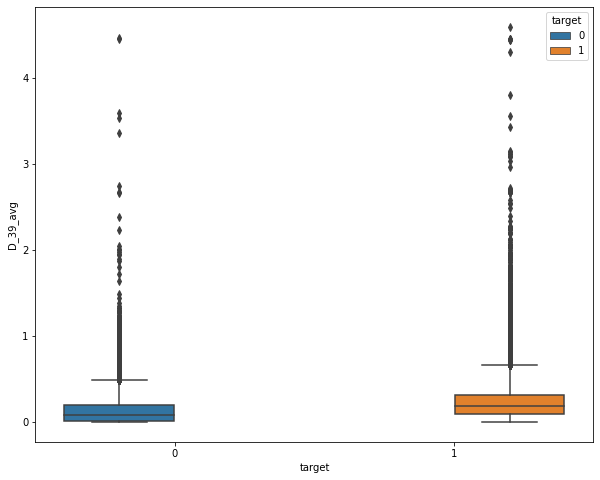

In [3]:
X = train_deli[['customer_ID', 'D_39', 'target']]

data_1 = pd.DataFrame(X.groupby(['customer_ID'])['D_39', 'target'].mean())
data_1['customer_ID'] = data_1.index
data_1 = data_1.reset_index(drop = True)
data_1 = data_1[['customer_ID', 'target', 'D_39']]
data_1.columns = ['customer_ID', 'target', 'D_39_avg']

plt.figure(figsize = (10, 8))
plot = sns.boxplot(x = 'target', y = 'D_39_avg', hue = 'target', data = data_1)

In [ ]:
data_1.head()

In [ ]:
X['customer_ID'][X['target'] == 0].unique()

In [ ]:
X['customer_ID'][X['target'] == 1].unique()

In [ ]:
A = X[X['customer_ID'] == '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5']
pd.Series(A['D_39'].to_list()).pct_change().mean()

In [ ]:
B = X[X['customer_ID'] == '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6']
pd.Series(B['D_39'].to_list()).pct_change().mean()

In [ ]:
Z = pd.DataFrame(X.groupby(['customer_ID', 'target'])['D_39'].pct_change())
Z.head()

In [ ]:
X.groupby('customer_ID')['D_39'].median()

In [ ]:
Y = X[np.isin(X['customer_ID'], ['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5', '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6', '0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e'])]

Z = pd.DataFrame(Y.groupby(['customer_ID'])['D_39'].apply(lambda x: pd.Series(x.to_list()).pct_change().mean()))
Z['customer_ID'] = Z.index
Z = Z.reset_index(drop = True)
Z.columns = ['D_30_change', 'customer_ID']
Z

In [31]:
Y = X[np.isin(X['customer_ID'], ['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5', '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6', '0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e'])]

# Z = pd.DataFrame(Y.groupby(['customer_ID'])['D_39'].apply(lambda x: x.iloc[[0, -1]].pct_change()))
Z = pd.DataFrame(Y.groupby(['customer_ID'])['D_39'].apply(lambda x: pd.Series(x.iloc[[0, -1]].to_list()).pct_change()))
Z = Z.dropna()
# Z['customer_ID'] = Z.index
# Z = Z.reset_index(drop = True)
# Z.columns = ['D_30_change', 'customer_ID']
Z

,,D_39
customer_ID,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,1,4.258526
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,1,-0.534758
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,1,5.607792
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,1,1906.726027
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,1,0.992248
0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e,1,0.444122


In [34]:
Z.index

MultiIndex([('0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', ...),
            ('00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5', ...),
            ('00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', ...),
            ('0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85', ...),
            ('00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6', ...),
            ('0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e', ...)],
           names=['customer_ID', None])

In [16]:
Z['customer_ID'][0]

('0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', 0)

In [17]:
Z['customer_ID'][1]

('0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', 12)

In [ ]:
Y.groupby(['customer_ID', 'target'])['D_39'].apply(lambda x: pd.Series(x.to_list()).pct_change().mean())

## Feaure Engineering of D_41

In [ ]:
X = train_deli[['customer_ID', 'D_41', 'target']]

data_1 = pd.DataFrame(X.groupby(['customer_ID'])['D_41', 'target'].mean())
data_1['customer_ID'] = data_1.index
data_1 = data_1.reset_index(drop = True)
data_1 = data_1[['customer_ID', 'target', 'D_41']]
data_1.columns = ['customer_ID', 'target', 'D_41_avg']

plt.figure(figsize = (10, 8))
plot = sns.boxplot(x = 'target', y = 'D_41_avg', hue = 'target', data = data_1)

In [ ]:
Y = X[np.isin(X['customer_ID'], ['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5', '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6', '0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e'])]

Z = pd.DataFrame(Y.groupby(['customer_ID', 'target'])['D_41'].apply(lambda x: pd.Series(x.to_list()).pct_change().mean()))
Z

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
X.describe()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Delinquency_Features.csv')
data.head()

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'target', y = 'D_39_median', data = data)